<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-1-phase-2-shriyan44/blob/main/Copy_of_DATA_301_Lab_1B_Shriya_Nimmagadda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

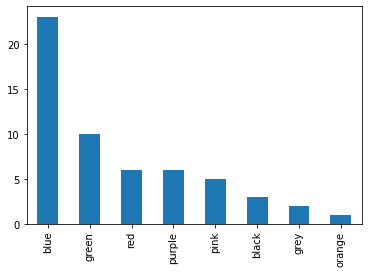

In [ ]:
import pandas as pd
sheet_url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822"
survey = sheet_url.replace("/edit#gid=", "/export?format=csv&gid=")
df_survey = pd.read_csv(survey)
df_survey["What is your favorite color?"].value_counts()
df_survey["Fav Colors"] = df_survey["What is your favorite color?"].map({
    "Blue": "blue",
    "blue": "blue",
    "Light Blue" : "blue",
    "Blue and Black" : "blue",
    "Blue/Indigo" : "blue",
    "Orange and Blue" : "blue",
    "turquoise" : "blue",
    "Teal" : "blue",
    "Green": "green",
    "green": "green",
    "dark green": "green",
    "Red" : "red",
    "red" : "red",
    "Purple" : "purple",
    "purple" : "purple",
    "Pink" : "pink",
    "light pink" : "pink",
    "pink" : "pink",
    "Magenta" : "pink",
    "Black" : "black",
    "black" : "black",
    "Blue and Black" : "black",
    "Orange and Blue" : "orange",
    "Navy" : "blue",
    "navy blue" : "blue",
    "Royal Blue" : "blue",
    "grey" : "grey",
    "Gray" : "grey"
})


df_survey["Fav Colors"].value_counts().plot.bar()



Most students like blue or some variation of it (22). The next most popular color is green, the least popular is orange, only one person likes it.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

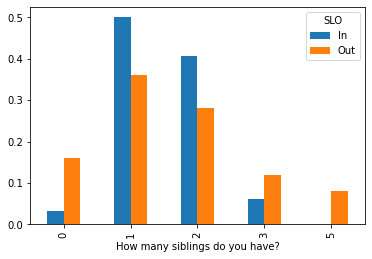

In [ ]:
df_survey["How many siblings do you have?"].head()
df_survey["SLO"] = df_survey["Where are you living this quarter?"].map({
    "Off Campus, outside of SLO" : "Out",
    "Off Campus, but in SLO" : "In",
    "On-Campus housing" : "In",
})


joint_sib_slo = pd.crosstab(df_survey["How many siblings do you have?"], df_survey["SLO"], normalize=True)
joint_sib_slo
slo = joint_sib_slo.sum(axis=0)
cond_sib_slo = joint_sib_slo.divide(slo, axis=1)
cond_sib_slo.plot.bar()

Theres no obvious trend in the relationship. In general it just seems like most people have 1-2 siblings, not based on their location.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

Text(0.5, 0, 'Golfballs')

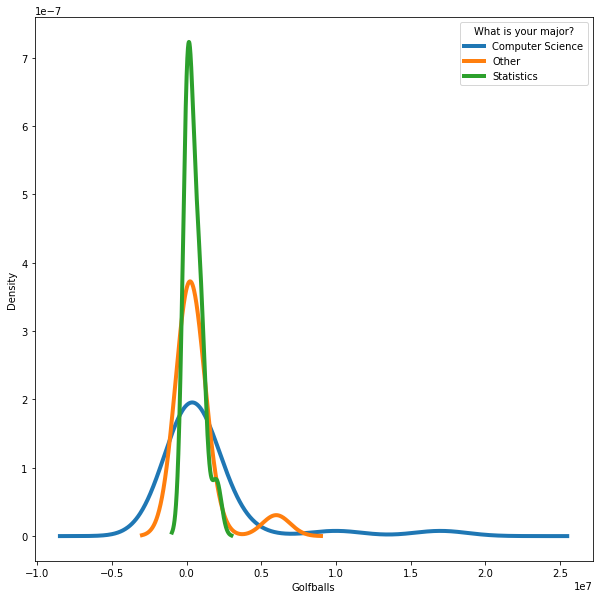

In [ ]:
# https://www.geeksforgeeks.org/multiple-density-plots-with-pandas-in-python/?ref=rp


df_survey["Golfballs"] = df_survey.iloc[:, [5]]
data_wide = df_survey.pivot(columns='What is your major?',
                     values='Golfballs')
data_wide.head()

import matplotlib.pyplot as plt
  
# calling density() to make
# multiple density plot 
data_wide.plot.density(figsize = (10, 10),
                       linewidth = 4)
  
plt.xlabel("Golfballs")

I used multiple density plots to visualize the guesses by major category. The Stats majors had the highest concentration of guesses around the .1 x 10^7 mark, next highest concentration of guesses at that point were from the Other Majors and the least concentration of guesses there from Comp Sci. Maybe the stats majors are better at guessing.

## Question 4

Write and answer your own question using this data set.

Is there any relationship between the golf ball guesses and whether or not the student is a sports fan?

Text(0.5, 0, 'Golfballs')

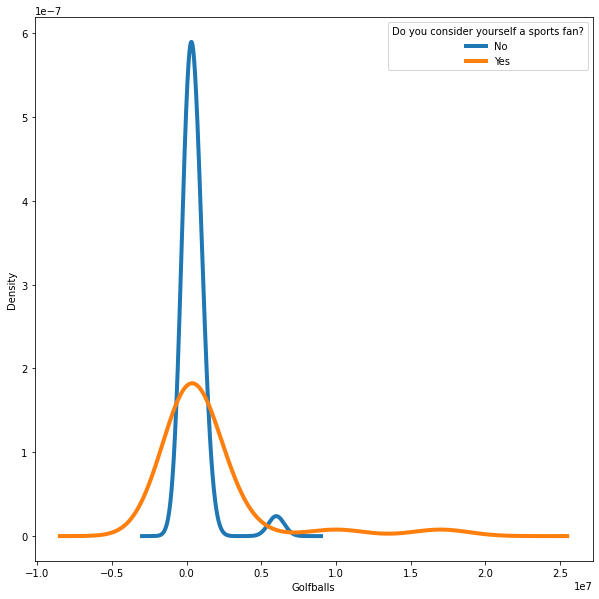

In [ ]:

df_survey["Golfballs"] = df_survey.iloc[:, [5]]
data_wide = df_survey.pivot(columns="Do you consider yourself a sports fan?",
                     values='Golfballs')
data_wide.head()

import matplotlib.pyplot as plt
  
# calling density() to make
# multiple density plot 
data_wide.plot.density(figsize = (10, 10),
                       linewidth = 4)
  
plt.xlabel("Golfballs")

Yes there actually does seems to be a pattern here. The Non sports fans had a higher concentration of guesses at the .1 x 10^7 point, whereas the sports fans guesses did have a few guesses at that point, but their guesses were a lot more spread out, more guesses above that point.